# Title: Analyzing Airbnb Seattle Dataset: Exploring Trends, patterns, and Opportunities for users


###  Problem Statement: 

The goal of this project is to evaluate the Airbnb Seattle dataset in order to spot important trends, problems that hosts and guests encounter, and potential ways to enhance the user experience.
We aim to respond to the following problems:

What areas in Seattle are the most well-liked for Airbnb rentals, and what feature go into that?
What are the typical Airbnb rental costs in various Seattle areas, and how do they change with the season?
What kinds of Airbnb listings are most popular in Seattle, and how do they differ in terms of cost, location, and property type?
What are the biggest issues that Seattle residents using Airbnb are dealing with, and how can these be resolved to enhance the user experience?


Background: Airbnb has become significant in providing temporary rental house, offering a convenient and reasonable alternative to conventional hotels and motels. Seattle is one of the most well-liked Airbnb locations in the country and so, the rapid expansion of Airbnb has also sparked problems about its effects on nearby areas, including rising housing costs, more noise and traffic, host availability, and a decline in long-term renting options.

Goals: By examining the Airbnb Seattle dataset, we seek to understand the major trends and issues that users confront and spot areas in which their experience could be improved. By supplying insightful data to Airbnb hosts and guests, this project has potential to advance hospitality and tourist industries more broadly. 

Depending on the issues analysed in the dataset, this project may be able to contribute to the problem. If the dataset relates to a particular issue in Seattle, such as affordable housing, transit, or public health, then this project can offer insights and ideas to deal with these issues.

Exploratory data analysis can tell the Patterns, trends, and anomalies can be seen in the data.visualizations can aid in the understanding and engagement of complicated data among a wider audience.This all can assist future actions, improvements, reasonable pricings and policies, so the isssues can be seen. 

The analysis to resolve these issues, we will processes the dataset and identify the features that have an impact on the popularity and reviews of a BnB. We will then use this information to make predictions that will help to resolve the issues. By predicting improved features related to the popularity of areas and other factors, we can enhance the overall user and host experience.

### Data Sources: 
The Seattle Airbnb Open Data is the source of our data, which contains listings with various property features as well as calendar date and price information of these listings in Seattle.There are around 3818 listings in the raw dataset from the data source.

### Importing libraries

In [32]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import datetime
from sklearn.metrics import confusion_matrix

In [33]:
calendar = pd.read_csv('dataset/calendar.csv')
listings = pd.read_csv('dataset/listings.csv')

In [34]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### Step 1: data cleaning for calendar.csv

In [35]:
# Editing date column - convert the object to a datetime object
calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d %H:%M:%S')

# Editing available column Change the way of presenting the boolean value; 1 if the value is 't'; 0 if 'f'; ignore the case.

calendar['available'].replace({'t': 1, 'f': 0},inplace=True)

#Making a copy of calendar column for separate analysis so that one dataframe size will not be too big.
calendar1= calendar

#  Extract the year, month, and date, day_name from the date columns
calendar1['year'] = calendar1['date'].dt.year
calendar1['month'] = calendar1['date'].dt.month
calendar1['day'] = calendar1['date'].dt.day
calendar1['day_name'] = calendar1['date'].dt.day_name()
# Convert string features to categorical features
calendar1['day_name'] = pd.Categorical(calendar1['day_name']).codes

#Remove dollar sign and , between numbers from price column
#convert to float and convert the NaN to 0, 

calendar1['price'] = calendar1['price'].str.replace('$', '')
calendar1['price'] = calendar1['price'].str.replace(',', '')

calendar1['price'].fillna(0, inplace=True)

calendar1['price'] = calendar1['price'].astype('float')




C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\1487969674.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar1['price'] = calendar1['price'].str.replace('$', '')


In [37]:
# check duplicated values
print(calendar1[calendar1.duplicated()])


Empty DataFrame
Columns: [listing_id, date, available, price, year, month, day, day_name]
Index: []


In [38]:
# Check for NaN
print(calendar1.isnull().sum())

listing_id    0
date          0
available     0
price         0
year          0
month         0
day           0
day_name      0
dtype: int64


### Step 2 Data cleaning of listings file

In [39]:
# Selecting useful columns
listings1 = listings.loc[:,['id', 'property_type', 'room_type', 'guests_included','accommodates','extra_people','bathrooms', 'bedrooms', 'beds', 'bed_type', 'room_type',
                     'price', 'instant_bookable','neighbourhood_group_cleansed','zipcode','latitude','longitude','reviews_per_month','number_of_reviews']] 

In [40]:
#To see all the column entries count and column names
pd.set_option('display.max_rows', None)
listings1.count()

id                              3818
property_type                   3817
room_type                       3818
guests_included                 3818
accommodates                    3818
extra_people                    3818
bathrooms                       3802
bedrooms                        3812
beds                            3817
bed_type                        3818
room_type                       3818
price                           3818
instant_bookable                3818
neighbourhood_group_cleansed    3818
zipcode                         3811
latitude                        3818
longitude                       3818
reviews_per_month               3191
number_of_reviews               3818
dtype: int64

In [41]:
listings1.head()
#

,id,property_type,room_type,guests_included,accommodates,extra_people,bathrooms,bedrooms,beds,bed_type,room_type,price,instant_bookable,neighbourhood_group_cleansed,zipcode,latitude,longitude,reviews_per_month,number_of_reviews
0,241032,Apartment,Entire home/apt,2,4,$5.00,1.0,1.0,1.0,Real Bed,Entire home/apt,$85.00,f,Queen Anne,98119,47.636289,-122.371025,4.07,207
1,953595,Apartment,Entire home/apt,1,4,$0.00,1.0,1.0,1.0,Real Bed,Entire home/apt,$150.00,f,Queen Anne,98119,47.639123,-122.365667,1.48,43
2,3308979,House,Entire home/apt,10,11,$25.00,4.5,5.0,7.0,Real Bed,Entire home/apt,$975.00,f,Queen Anne,98119,47.629724,-122.369483,1.15,20
3,7421966,Apartment,Entire home/apt,1,3,$0.00,1.0,0.0,2.0,Real Bed,Entire home/apt,$100.00,f,Queen Anne,98119,47.638473,-122.369279,NaN,0
4,278830,House,Entire home/apt,6,6,$15.00,2.0,3.0,3.0,Real Bed,Entire home/apt,$450.00,f,Queen Anne,98119,47.632918,-122.372471,0.89,38


In [42]:
print(listings1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3818 non-null   int64  
 1   property_type                 3817 non-null   object 
 2   room_type                     3818 non-null   object 
 3   guests_included               3818 non-null   int64  
 4   accommodates                  3818 non-null   int64  
 5   extra_people                  3818 non-null   object 
 6   bathrooms                     3802 non-null   float64
 7   bedrooms                      3812 non-null   float64
 8   beds                          3817 non-null   float64
 9   bed_type                      3818 non-null   object 
 10  room_type                     3818 non-null   object 
 11  price                         3818 non-null   object 
 12  instant_bookable              3818 non-null   object 
 13  nei

### Column : neighbourhood_group_cleansed data pre-procssing

In [44]:
listings1['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [45]:
# neighbourhood_group_cleansed data into dummy variables
listings1['neighbourhood_group_cleansed'].fillna(0, inplace=True)
neighbourhood_group_cleansed = pd.get_dummies(listings1['neighbourhood_group_cleansed'])
listings1 = pd.merge(listings1, neighbourhood_group_cleansed, left_index=True, right_index=True)
listings1 = listings1.drop('neighbourhood_group_cleansed', 1)


C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\526998865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings1['neighbourhood_group_cleansed'].fillna(0, inplace=True)
C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\526998865.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  listings1 = listings1.drop('neighbourhood_group_cleansed', 1)


### Column:  instant_booking data pre-processing

In [46]:
# 1_3 Change the way of presenting the boolean value; 1 if the value is 't'; 0 if 'f'; ignore the case.
listings1['instant_bookable']= listings1['instant_bookable'].replace({'t': 1, 'f': 0})

### Column: Price and 'extra_people' - Data Preprocessing

In [47]:
#Remove dollar sign and , between numbers from price column
#convert to float and convert the NaN to 0, 
listings1['price'] = listings1['price'].str.replace('$', '')
listings1['price'] = listings1['price'].str.replace(',', '')
listings1['price'].fillna(0, inplace=True)
listings1['price'] = listings1['price'].astype('float')

#Remove dollar sign and , between numbers convert to float and convert the NaN to 0, from extra_people column
listings1['extra_people'] = listings1['extra_people'].str.replace('$', '')
listings1['extra_people'] = listings1['extra_people'].astype('float')
listings1['extra_people'].fillna(0, inplace=True)


C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\3321653177.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings1['price'] = listings1['price'].str.replace('$', '')
C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\3321653177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings1['price'].fillna(0, inplace=True)
C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\3321653177.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings1['extra_people'] = listings1['extra_people'].

### Column: Property type

In [48]:
# Property type data into dummy variables

listings1['property_type'].fillna(0, inplace=True)
property1 = pd.get_dummies(listings1['property_type'])
listings1 = pd.merge(listings1, property1, left_index=True, right_index=True)
listings1 = listings1.drop('property_type', 1)


C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\1942613218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings1['property_type'].fillna(0, inplace=True)
C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\1942613218.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  listings1 = listings1.drop('property_type', 1)


### Column: Room type data pre-processing

In [49]:
# room type data into dummy variables
listings1['room_type'].fillna(0, inplace=True)
room_type = pd.get_dummies(listings1['room_type'])
listings1 = pd.merge(listings1, room_type, left_index=True, right_index=True)
listings1 = listings1.drop('room_type', 1)

C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\1666853587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings1['room_type'].fillna(0, inplace=True)
C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\1666853587.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  listings1 = listings1.drop('room_type', 1)


### Column: bed_type data pre-processing

In [50]:
listings1['bed_type'].fillna(0, inplace=True)
bed_type = pd.get_dummies(listings1['bed_type'])
listings1= pd.merge(listings1, bed_type, left_index=True, right_index=True)
listings1 = listings1.drop('bed_type', 1)

C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\951188130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings1['bed_type'].fillna(0, inplace=True)
C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\951188130.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  listings1 = listings1.drop('bed_type', 1)


### Column: zipcode Data prep-processing

In [51]:
# Replace missing values in the 'zipcode' column with zero
listings1['zipcode'].fillna(0, inplace=True)

# Drop rows with 'zipcode' value of '99\n98122'
listings1=listings1.drop(listings1[listings1['zipcode'] == '99\n98122'].index)

# Convert 'zipcode' column to string
listings1['zipcode'] = listings1['zipcode'].apply(str)


C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\3805302226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings1['zipcode'].fillna(0, inplace=True)


### Column : guests_included,accommodates, bathrooms, bedrooms, bed data pre-processing

In [52]:
listings1['guests_included'].fillna(0, inplace=True)
listings1['accommodates'].fillna(0, inplace=True)

C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\670631925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings1['guests_included'].fillna(0, inplace=True)
C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\670631925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings1['accommodates'].fillna(0, inplace=True)


In [53]:
listings1.head()

,id,guests_included,accommodates,extra_people,bathrooms,bedrooms,beds,price,instant_bookable,zipcode,...,room_type_Private room,room_type_Shared room,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,241032,2,4,5.0,1.0,1.0,1.0,85.0,0,98119,...,0,0,1,0,0,0,0,0,0,1
1,953595,1,4,0.0,1.0,1.0,1.0,150.0,0,98119,...,0,0,1,0,0,0,0,0,0,1
2,3308979,10,11,25.0,4.5,5.0,7.0,975.0,0,98119,...,0,0,1,0,0,0,0,0,0,1
3,7421966,1,3,0.0,1.0,0.0,2.0,100.0,0,98119,...,0,0,1,0,0,0,0,0,0,1
4,278830,6,6,15.0,2.0,3.0,3.0,450.0,0,98119,...,0,0,1,0,0,0,0,0,0,1


In [54]:
#function to normalise column
def normalizing(col):
    new = (col - col.min()) / (col.max() - col.min())
    return new

### Making a copy of data to normalise for EDA by PCA 

In [55]:
#Making a copy of data to normalise for EDA by PCA 
calendar2 =calendar1.copy()
#MAKING A COPY OF data for EDA by PCA
listings2 = listings1.copy()


listings2['accommodates'] = normalizing(listings2['accommodates'])
listings2['bathrooms'] = normalizing(listings2['bathrooms'])
listings2['bedrooms'] = normalizing(listings2['bedrooms'])
listings2['beds'] = normalizing(listings2['beds'])
listings2['reviews_per_month'] = normalizing(listings2['reviews_per_month'])
listings2['number_of_reviews'] = normalizing(listings2['number_of_reviews'])
listings2['guests_included'] = normalizing(listings2['guests_included'])
listings2['price'] = normalizing(listings2['price'])
listings2['extra_people'] = normalizing(listings2['extra_people'])

calendar2['price'] = normalizing(calendar2['price'])

### Merging calendar and listings dataset to set availablity of listings with all the paramerters

In [56]:
# data in real world form
calendar1 = calendar1.rename(columns={'listing_id': 'id'})
calendar1 = calendar1.groupby('id').first().reset_index()

merged_df = pd.merge(listings1, calendar1, on='id', how='left')
merged_df = merged_df.rename(columns={'price_x': 'Price'})
# Repeating columns
df = merged_df.drop('price_y', axis=1)

# normalised data for analysis
calendar2 = calendar2.rename(columns={'listing_id': 'id'})
calendar2 = calendar2.groupby('id').first().reset_index()

merged_df2 = pd.merge(listings2, calendar2, on='id', how='left')
merged_df2 = merged_df2.rename(columns={'price_x': 'Price'})
# Repeating columns
df2 = merged_df2.drop('price_y', axis=1)

In [57]:
# real world  data for analysis remove not available values
df = df.dropna()
has_nan = df.isna().any()

listings1 = listings1.dropna()

#normalised data for analysis remove not available values

df2 = df2.dropna()
has_nan2 = df2.isna().any()

listings2 = listings2.dropna()

In [58]:
print(df.columns)

Index(['id', 'guests_included', 'accommodates', 'extra_people', 'bathrooms',
       'bedrooms', 'beds', 'Price', 'instant_bookable', 'zipcode', 'latitude',
       'longitude', 'reviews_per_month', 'number_of_reviews', 'Ballard',
       'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area', 'Delridge',
       'Downtown', 'Interbay', 'Lake City', 'Magnolia', 'Northgate',
       'Other neighborhoods', 'Queen Anne', 'Rainier Valley', 'Seward Park',
       'University District', 'West Seattle', 'Apartment', 'Bed & Breakfast',
       'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Chalet', 'Condominium',
       'Dorm', 'House', 'Loft', 'Other', 'Tent', 'Townhouse', 'Treehouse',
       'Yurt', 'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'Airbed', 'Couch',
       'Futon', 'Pull-out Sofa', 'Real Bed', 'date', 'available', 'year',
       'month', 'day', 'day_name'],
   

### Step 2: EDA

### Summary of all the individual columns

In [59]:
df.describe()

,id,guests_included,accommodates,extra_people,bathrooms,bedrooms,beds,Price,instant_bookable,latitude,...,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,available,year,month,day,day_name
count,3.172000e+03,3172.000000,3172.00000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,...,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.0,3172.0,3172.0,3172.0
mean,5.048688e+06,1.714691,3.38966,11.390605,1.259773,1.306431,1.744641,127.218474,0.169609,47.628770,...,0.005675,0.002522,0.019861,0.011980,0.959962,0.453026,2016.0,1.0,4.0,1.0
std,2.788969e+06,1.316609,1.99561,18.065868,0.594823,0.879019,1.155951,90.360254,0.375348,0.042951,...,0.075128,0.050165,0.139546,0.108812,0.196079,0.497867,0.0,0.0,0.0,0.0
min,4.291000e+03,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,22.000000,0.000000,47.505088,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,1.0,4.0,1.0
25%,2.748989e+06,1.000000,2.00000,0.000000,1.000000,1.000000,1.000000,75.000000,0.000000,47.608657,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2016.0,1.0,4.0,1.0
50%,5.324836e+06,1.000000,3.00000,5.000000,1.000000,1.000000,1.000000,100.000000,0.000000,47.623259,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2016.0,1.0,4.0,1.0
75%,7.485814e+06,2.000000,4.00000,20.000000,1.000000,2.000000,2.000000,150.000000,0.000000,47.662323,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2016.0,1.0,4.0,1.0
max,1.024814e+07,13.000000,16.00000,300.000000,8.000000,7.000000,15.000000,1000.000000,1.000000,47.733358,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.0,1.0,4.0,1.0


### Datatype and null values in the dataset

In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 0 to 3813
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         3172 non-null   int64         
 1   guests_included            3172 non-null   int64         
 2   accommodates               3172 non-null   int64         
 3   extra_people               3172 non-null   float64       
 4   bathrooms                  3172 non-null   float64       
 5   bedrooms                   3172 non-null   float64       
 6   beds                       3172 non-null   float64       
 7   Price                      3172 non-null   float64       
 8   instant_bookable           3172 non-null   int64         
 9   zipcode                    3172 non-null   object        
 10  latitude                   3172 non-null   float64       
 11  longitude                  3172 non-null   float64       
 12  review

### Non graphical EDA

In [363]:
df.groupby('id')['available'].sum().max()

1

In [364]:
su = df.groupby('id')['available'].sum()
su.head()

id
4291    1
5682    0
6606    1
7369    0
9419    1
Name: available, dtype: int64

In [365]:
mea = df.groupby('id')['available'].mean()
mea.head()

id
4291    1.0
5682    0.0
6606    1.0
7369    0.0
9419    1.0
Name: available, dtype: float64

In [366]:
med = df.groupby('id')['available'].median() 
med.head()

id
4291    1.0
5682    0.0
6606    1.0
7369    0.0
9419    1.0
Name: available, dtype: float64

### PCA and ploting biplot

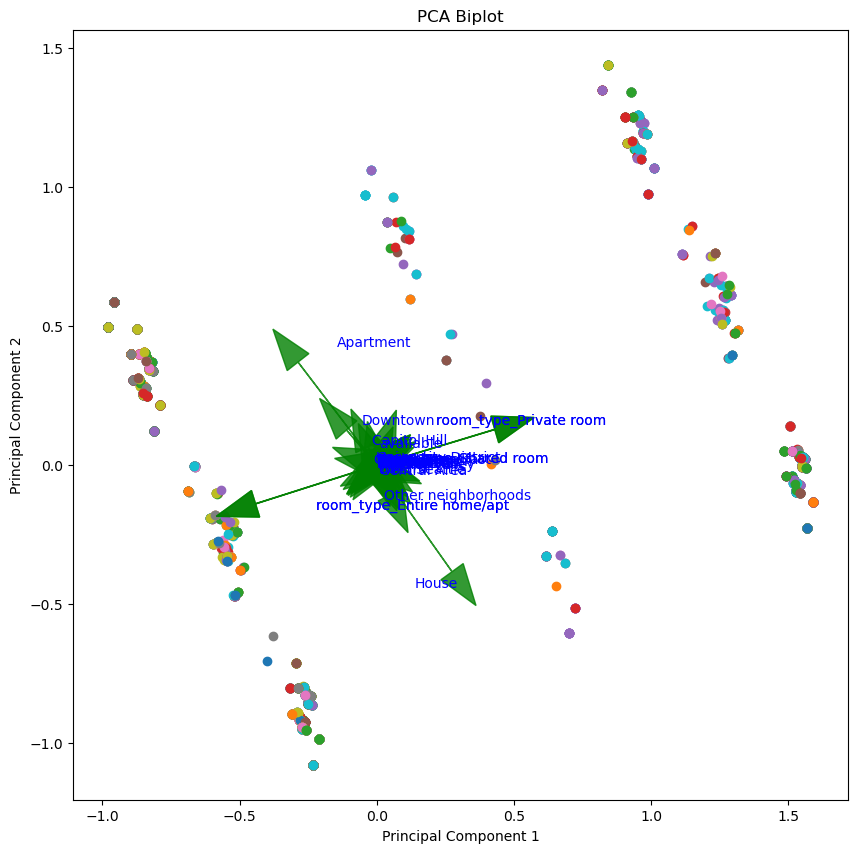

In [367]:
from sklearn.decomposition import PCA


# separate the target variable
target = df2['Price']
data = df2[[ 'available'
        ,'House', 'Apartment',
       'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Chalet',
       'Condominium', 'Dorm', 'Loft', 'Tent', 'Townhouse',
       'Treehouse', 'Yurt', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'Ballard',
       'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area', 'Delridge',
       'Downtown', 'Interbay', 'Lake City', 'Magnolia', 'Northgate',
       'Other neighborhoods', 'Queen Anne', 'Rainier Valley', 'Seward Park',
       'University District', 'West Seattle']]

# create PCA object with n_components=2
pca = PCA(n_components=2)

# fit the PCA model to the data
pca.fit(data)

# transform the data to its principal components
transformed_data = pca.transform(data)

# create a new dataframe with the transformed data
df_transformed = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2'])

# add the target variable back to the transformed dataframe
df_transformed['target'] = target

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# create a biplot
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Biplot')

# plot data points
for i, target_value in enumerate(np.unique(target)):
    ax.scatter(transformed_data[target==target_value, 0], 
               transformed_data[target==target_value, 1],
               label=target_value)

# plot loadings
for i, feature_name in enumerate(data.columns):
    ax.arrow(0, 0, loadings[i,0], loadings[i,1], 
             color='g', alpha=0.8, head_width=0.1)
    ax.text(loadings[i,0]* 0.5, loadings[i,1] * 1.15, feature_name, color='b')


plt.show()



### Histogram of  bed count 

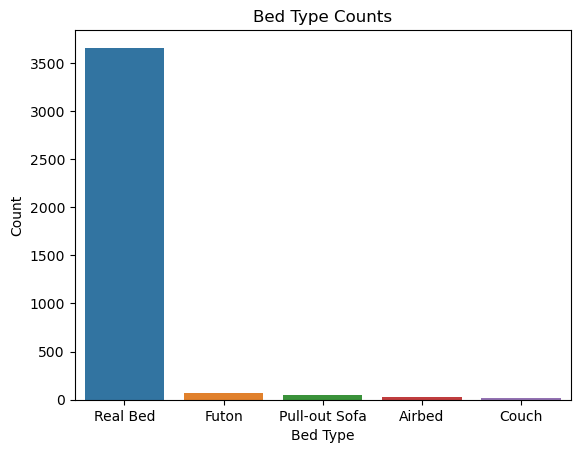

In [368]:
sns.countplot(x='bed_type', data=listings)
plt.title('Bed Type Counts')
plt.xlabel('Bed Type')
plt.ylabel('Count')
plt.show()

### Scatter plot of Bedrooms and Price

Text(0, 0.5, 'bedrooms count')

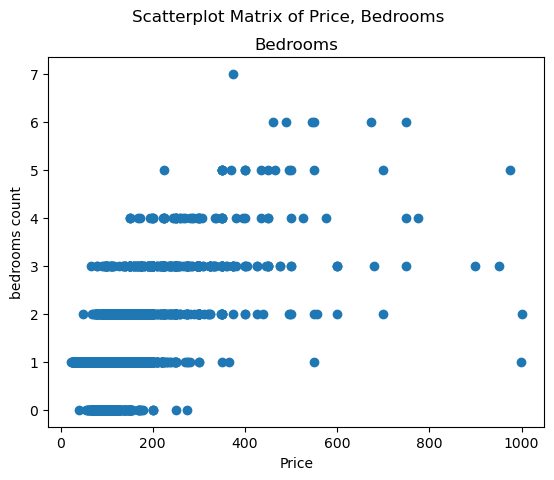

In [369]:
plt.suptitle('Scatterplot Matrix of Price, Bedrooms')
plt.scatter(x = df['Price'], y=df['bedrooms'])
plt.title('Bedrooms')
plt.xlabel('Price')
plt.ylabel('bedrooms count')

### Plot Count of room by room type

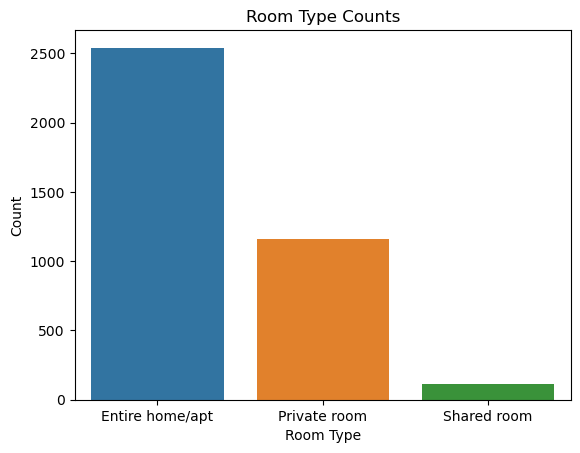

In [370]:
sns.countplot(x='room_type', data=listings)
plt.title('Room Type Counts')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

### Analysising the calender file for price and date variations

In [371]:
calendar1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3818 non-null   int64         
 1   date       3818 non-null   datetime64[ns]
 2   available  3818 non-null   int64         
 3   price      3818 non-null   float64       
 4   year       3818 non-null   int64         
 5   month      3818 non-null   int64         
 6   day        3818 non-null   int64         
 7   day_name   3818 non-null   int8          
dtypes: datetime64[ns](1), float64(1), int64(5), int8(1)
memory usage: 212.7 KB


### Plot of average price vs week day

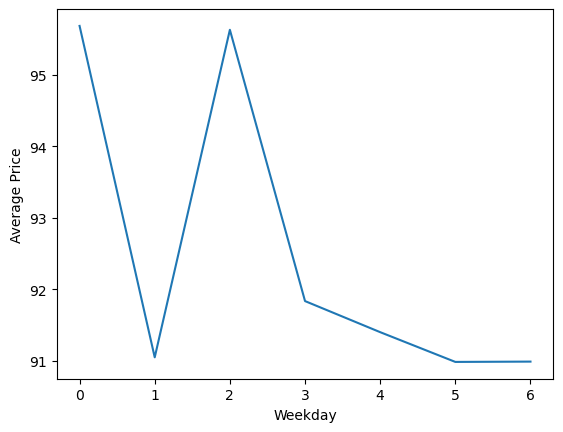

In [372]:
# Plot of average price vs week day 

grouped_data = calendar.groupby(calendar['day_name'])
avg_price = grouped_data['price'].mean()



plt.plot(avg_price.index, avg_price.values)
plt.xlabel('Weekday')
plt.ylabel('Average Price')
plt.show()

### Available of house in different zipcode in seattle with price

Text(0.5, 1.0, 'Price vs zipcode')

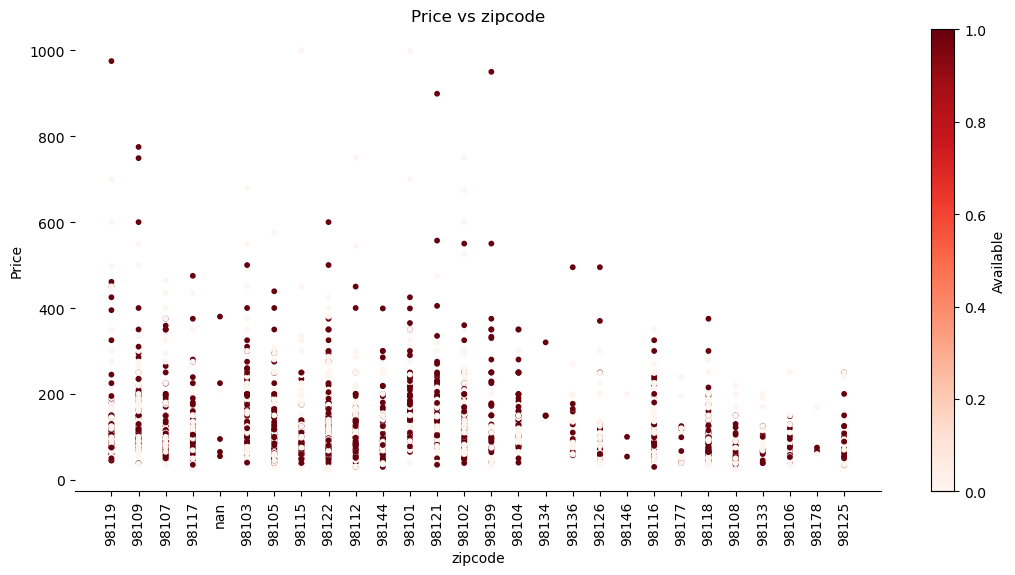

In [373]:
fig, ax = plt.subplots(figsize=(13,6))
p = ax.scatter(df['zipcode'], df['Price'], s=10, c=df['available'], cmap="Reds")
colorbar = fig.colorbar(p)
colorbar.set_label("Available")
sns.despine(left=True)
plt.xticks(rotation=90)
ax.set_xlabel("zipcode")
ax.set_ylabel("Price")
ax.set_title("Price vs zipcode")

###  Histogram to plot total number of listings in the price range

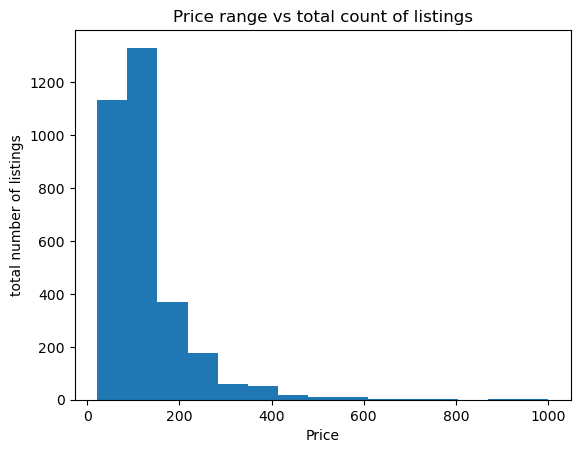

In [374]:
plt.hist(df['Price'],bins=15)
plt.title('Price range vs total count of listings')
plt.xlabel('Price')
plt.ylabel('total number of listings')
plt.show()

### Scatter plot to see area wise Price

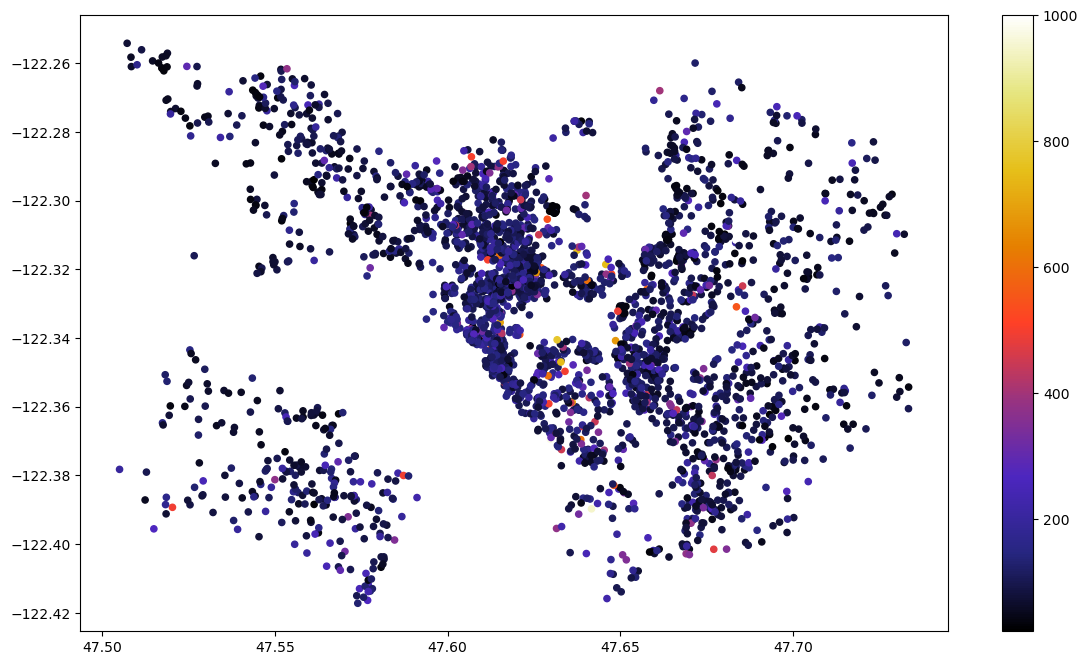

In [375]:
plt.figure(figsize=(14,8))
points = plt.scatter(df['latitude'], df['longitude'], c=df["Price"], s=20, cmap="CMRmap") 
plt.colorbar(points)

### Scatter plot to see area wise Availability

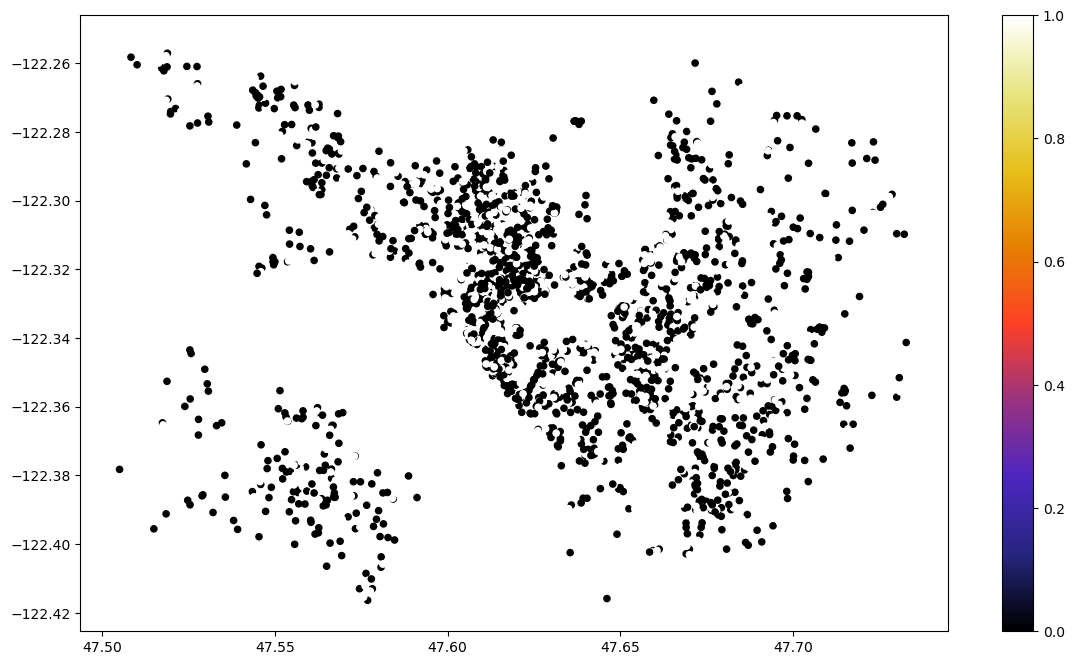

In [376]:
plt.figure(figsize=(14,8))
points = plt.scatter(df['latitude'], df['longitude'], c=df["available"], s=20, cmap="CMRmap") 
plt.colorbar(points)

# Phase 2

### Import machine learning libraries

In [61]:
#Import machine learning
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import pickle

### Prepare train and test datasets for modelling

In [64]:
#prepare train and test datasets for modelling
TEST_SIZE = 0.2
RAND_STATE = 42

X = df.drop(columns = ['Price', 'date','latitude','zipcode','id','longitude','day_name','number_of_reviews','reviews_per_month'])
y = df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [65]:
print(X_test.columns)

Index(['guests_included', 'accommodates', 'extra_people', 'bathrooms',
       'bedrooms', 'beds', 'instant_bookable', 'Ballard', 'Beacon Hill',
       'Capitol Hill', 'Cascade', 'Central Area', 'Delridge', 'Downtown',
       'Interbay', 'Lake City', 'Magnolia', 'Northgate', 'Other neighborhoods',
       'Queen Anne', 'Rainier Valley', 'Seward Park', 'University District',
       'West Seattle', 'Apartment', 'Bed & Breakfast', 'Boat', 'Bungalow',
       'Cabin', 'Camper/RV', 'Chalet', 'Condominium', 'Dorm', 'House', 'Loft',
       'Other', 'Tent', 'Townhouse', 'Treehouse', 'Yurt',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'Airbed', 'Couch',
       'Futon', 'Pull-out Sofa', 'Real Bed', 'available', 'year', 'month',
       'day'],
      dtype='object')


### Methods to train the model used are as follows:
<br>1-Random Forest
<br>2-Gradient Boosting Regressor 
<br>3-K-Nearest Neighbors (KNN)
<br>4-ElasticNetCV with linear regression model 
<br>5-Ridge regression model with polynomial features

# Random forest

Random Forest Regression is flexible and easy to use machine learning method that can work with categorical and numerical features, and is robust to outliers and overfitting.To tune the model, the number of estimators and maximum depth were set, and the maximum number of features considered for each split was set to the square root of the total number of features. The model was trained on the training set and tested on the test set, and the performance was evaluated using mean squared error and R-squared metrics.

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_text

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['mse', 'mae'],
    'max_depth': [5, 10]
}
S
# Define the RandomForestRegressor model
forest = RandomForestRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train.squeeze())

# Print the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best MSE: ", np.sqrt(-grid_search.best_score_))

# Re-train the model with the best hyperparameters
forest = grid_search.best_estimator_
forest.fit(X_train, y_train.squeeze())

# Calculate scores for the tuned model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Tuned Random Forest MSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_preds)),
        np.sqrt(mean_squared_error(y_test, y_test_preds))))
print('Tuned Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

print(export_text(forest.estimators_[0], spacing=3, decimals=3))

# Save model weights
with open('model2.pkl', 'wb') as file:
    pickle.dump(forest, file)


C:\Users\29vai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Best hyperparameters:  {'criterion': 'mse', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best MSE:  nan


C:\Users\29vai\AppData\Local\Temp\ipykernel_14528\353545366.py:23: RuntimeWarning: invalid value encountered in sqrt
  print("Best MSE: ", np.sqrt(-grid_search.best_score_))
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Tuned Random Forest MSE train: 46.981, test: 58.017
Tuned Random Forest R^2 train: 0.725, test: 0.611
|--- feature_8 <= 0.500
|   |--- feature_1 <= 4.500
|   |   |--- feature_33 <= 0.500
|   |   |   |--- feature_41 <= 0.500
|   |   |   |   |--- feature_48 <= 0.500
|   |   |   |   |   |--- feature_42 <= 0.500
|   |   |   |   |   |   |--- feature_13 <= 0.500
|   |   |   |   |   |   |   |--- feature_3 <= 1.250
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.500
|   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.500
|   |   |   |   |   |   |   |   |   |   |--- value: [120.571]
|   |   |   |   |   |   |   |   |   |--- feature_11 >  0.500
|   |   |   |   |   |   |   |   |   |   |--- value: [108.353]
|   |   |   |   |   |   |   |   |--- feature_6 >  0.500
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 17.500
|   |   |   |   |   |   |   |   |   |   |--- value: [97.856]
|   |   |   |   |   |   |   |   |   |--- feature_2 >  17.500
|   |   |   |   |   |   |   |   |   |   |--- val

Text(0.5, 1.0, 'Predicted Values')

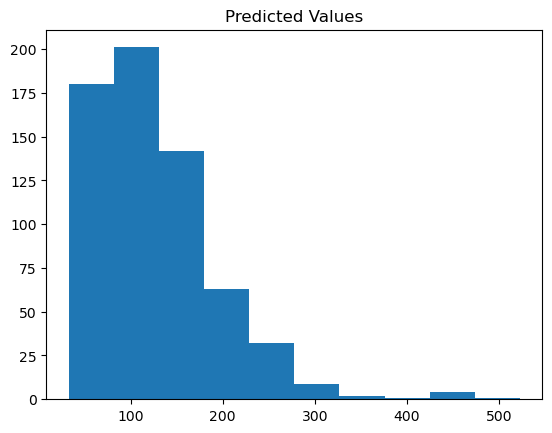

In [67]:
import matplotlib.pyplot as plt
plt.hist(y_test_preds)
plt.title('Predicted Values')


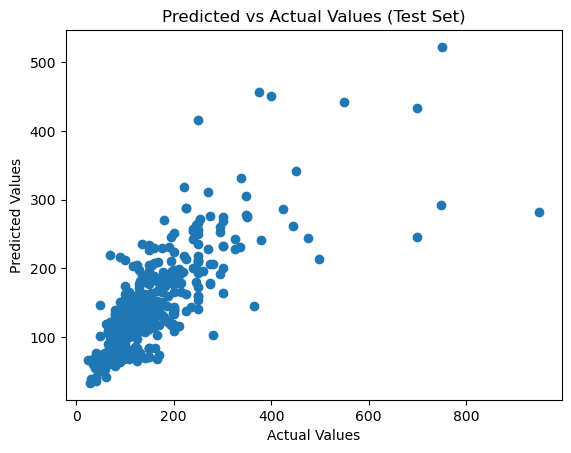

In [68]:
plt.scatter(y_test, y_test_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Test Set)')
plt.show()


The results showed that the Random Forest model was effective in predicting the price of the Airbnb rentals, with a low training MSE of 46 and a testing MSE of 58, and a high training R2 of 72% and testing R2 of 61%. This indicate that the model explains a significant portion of the variance in the data, and the MSE values indicate that the model has good predictive accuracy.
In conclusion, the Random Forest Regression algorithm is effective in predicting the prices of Airbnb rentals in Seattle. 

# Gradient Boosting Regressor

### Introduction- 
Gradient Boosting Regressor is a powerful algorithm for regression tasks that is able to handle both linear and non-linear relationships between the input variables and the target variable.Gradient Boosting Regressor (GBR) is a machine learning algorithm that belongs to the family of boosting algorithms. Boosting is an ensemble learning technique that combines several weak models to create a strong model. In GBR, each weak model is a decision tree, and the models are added sequentially to the ensemble in a way that the new model corrects the errors of the previous one.
The main idea behind GBR is to fit a sequence of models to the data, where each successive model is trained on the residuals (the difference between the predicted and actual values) of the previous model. This way, the algorithm tries to minimize the errors of the previous model in each iteration.
In order to tune and train the GBR model, we typically need to adjust hyperparameters such as the number of trees (n_estimators), the maximum depth of the trees (max_depth), the minimum number of samples required to split an internal node (min_samples_split), the minimum number of samples required to be at a leaf node (min_samples_leaf), and the learning rate (learning_rate), which determines the contribution of each tree to the final prediction.Overall, GBR is a powerful algorithm that can be very effective for regression tasks.


### Implementation- 
The model is used to predict the price of Airbnb listings in Seattle.It is used to tune the hyperparameters of the model to achieve better performance. GridSearchCV searches over a range of hyperparameters and finds the combination of hyperparameters that results in the best performance, as measured by a given evaluation metric. In this case, the evaluation metric is R-squared, which measures the proportion of the variance in the price explained by other features.

The hyperparameters that were tuned in the model include the number of estimators, maximum depth, minimum samples split, minimum samples leaf, and learning rate. These hyperparameters were chosen based on empirical evidence and knowledge of the problem domain.

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the range of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'learning_rate': [0.1,0.01]
}

# Create a gradient boosting regressor
gb_reg = GradientBoostingRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and evaluate it on the test data
best_gb_reg = grid_search.best_estimator_
y_train_preds = best_gb_reg.predict(X_train)
y_test_preds = best_gb_reg.predict(X_test)

# Print train and test MSE and R2
print('Gradient Boosting MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_preds),
    mean_squared_error(y_test, y_test_preds)))
print('Gradient Boosting R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_preds),
    r2_score(y_test, y_test_preds)))


C:\Users\29vai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting MSE train: 2320.089, test: 3253.321
Gradient Boosting R^2 train: 0.711, test: 0.624


Text(0.5, 1.0, 'y_test_predicted')

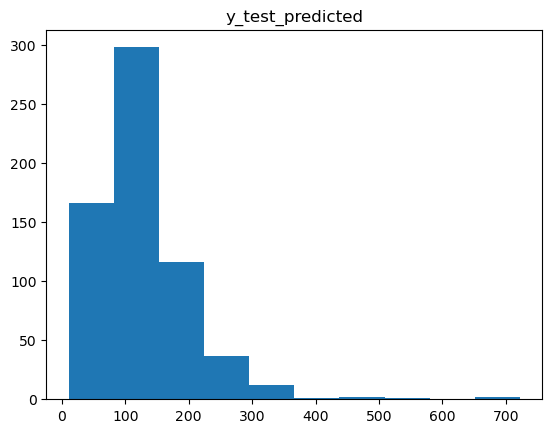

In [70]:
import matplotlib.pyplot as plt
plt.hist(y_test_preds)
plt.title('y_test_predicted')

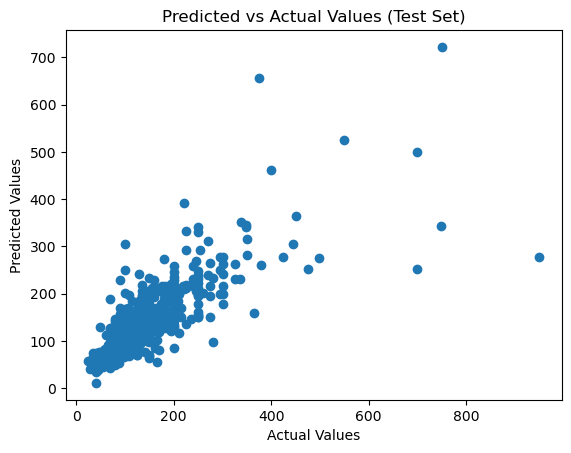

In [71]:
plt.scatter(y_test, y_test_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Test Set)')
plt.show()

#  K-Nearest Neighbors (KNN) Regressor.

The algorithm used in this case is K-Nearest Neighbors (KNN) Regressor. KNN is a simple yet powerful algorithm that is based on the idea that similar data points tend to have similar target values. In KNN, the predicted target value for a new data point is calculated by averaging the target values of its k-nearest neighbors in the training data. To tune the KNN Regressor, a GridSearchCV was used with a pipeline that included a StandardScaler to standardize the features, SelectKBest to select the best features based on the F-regression test, and KNN Regressor. The parameters that were tuned include the number of neighbors (n_neighbors), the distance metric (p), and the number of features selected (k). The best parameters that were found were n_neighbors=5, p=2, and k=10.

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selectkbest', SelectKBest(f_regression)),
    ('knn', KNeighborsRegressor())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'selectkbest__k': [5, 10, 15, 20],
    'knn__n_neighbors': [2, 3, 4, 5],
    'knn__p': [1, 2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict target variable for test data using the best model
y_pred = grid_search.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("R-squared: ", r2)


C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarn

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarn

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarn

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarn

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarn

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarn

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarn

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarn

Best parameters:  {'knn__n_neighbors': 5, 'knn__p': 1, 'selectkbest__k': 20}
Best score:  0.5567917218094949
R-squared:  0.5363353158659079


C:\Users\29vai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms


Text(0.5, 1.0, 'y_predicted')

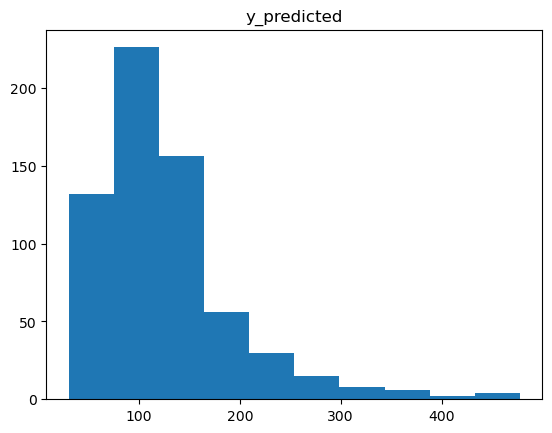

In [73]:
import matplotlib.pyplot as plt
plt.hist(y_pred)
plt.title('y_predicted')

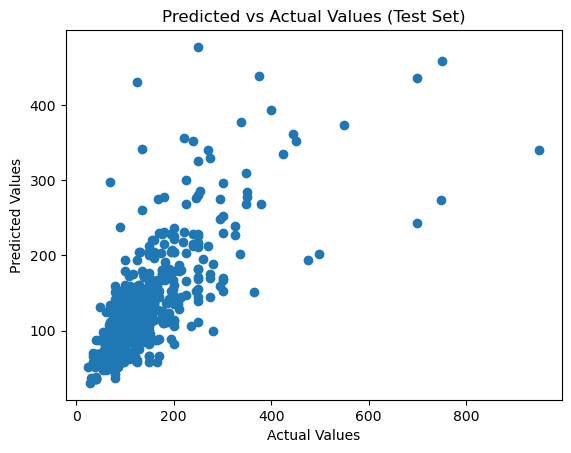

In [74]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Test Set)')
plt.show()


# ElasticNetCV in a linear regression model 

ElasticNetCV is a linear regression model with both L1 and L2 regularization. The L1 regularization helps in feature selection by driving some of the coefficients to zero, whereas the L2 regularization helps in reducing overfitting.ElasticNetCV, with its ability to handle both L1 and L2 regularization, is a good choice for this problem because it can help in feature selection and prevent overfitting. Hyperparameter tuning is performed using GridSearchCV with different combinations of tol and max_iter. The model is then fit on the training data and evaluated using mean squared error and R2 on both train and test data.

In [75]:
from sklearn.linear_model import ElasticNetCV
from sklearn.feature_selection import RFE

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature selection
estimator = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5)
selector = RFE(estimator, n_features_to_select=15, step=1)
selector = selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

# Hyperparameter tuning
param_grid = {'tol': [0.05, 1e-3, 1e-4, 1e-5], 'max_iter': [1000, 5000, 10000]}
model = GridSearchCV(ElasticNetCV(), param_grid, cv=5)
model.fit(X_train, y_train)

# Predict target variable for test data
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

# Print train and test MSE and R2
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_preds),
    mean_squared_error(y_test, y_test_preds)))
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_preds),
    r2_score(y_test, y_test_preds)))


C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d

C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d

MSE train: 3386.718, test: 3723.691
R^2 train: 0.578, test: 0.570


C:\Users\29vai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'y_test_predicted')

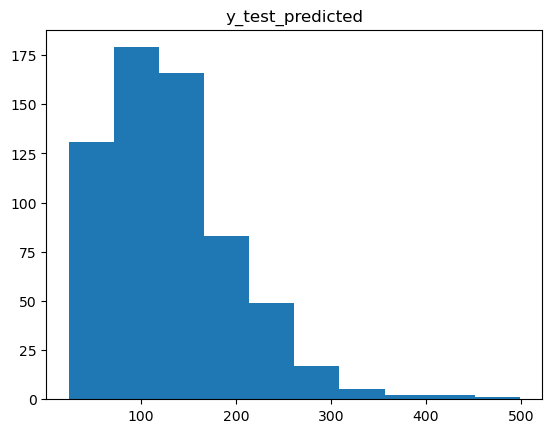

In [76]:
import matplotlib.pyplot as plt
plt.hist(y_test_preds)
plt.title('y_test_predicted')

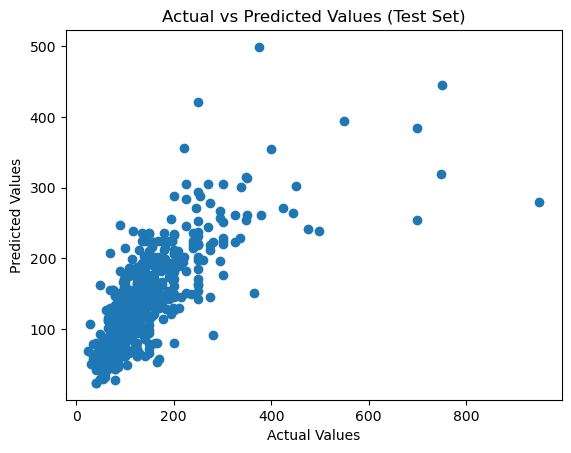

In [77]:
plt.scatter(y_test, y_test_preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Test Set)")
plt.show()

 The feature selection step performed using RFE can provide insight into which features are most important for predicting price. The selected features can be used to gain insight into which features are most strongly correlated with price in the Seattle AirBnB market. Hyperparameter tuning step performed using GridSearchCV can help identify the optimal values for the hyperparameters tol and max_iter, which can be useful for improving the performance of the model.

# Ridge regression model with polynomial features

Ridge Regression model with Polynomial Features. Ridge regression is a regularized linear regression model that shrinks the coefficients of the regression towards zero, which helps to reduce overfitting and improve the generalization of the model. Polynomial features are added to the model to capture the non-linear relationships between the features and the target variable. The degree of the polynomial features was set to 2.The model was tuned using GridSearchCV to find the optimal hyperparameters for the model. The hyperparameters that were tuned include the regularization parameter alpha, the solver used to compute the weights, the tolerance for stopping criteria, the maximum number of iterations and 5-fold cross-validation.

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
# Polynomial regression
degree = 2 # adjust the degree as needed
poly = PolynomialFeatures(degree)

# Hyperparameter tuning
param_grid = {'ridge__alpha': [0.1, 1, 10], 'ridge__solver': ['auto', 'svd',  'lsqr'],
              'ridge__tol': [1e-3, 1e-5], 'ridge__max_iter': [1000, 5000, 10000]}

# Create pipeline with polynomial features and Ridge regression
pipe = make_pipeline(poly, Ridge())

# Use GridSearchCV for hyperparameter tuning
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(X_train_scaled, y_train)

# Predict target variable for test data
y_test_preds = model.predict(X_test_scaled)
y_train_preds = model.predict(X_train_scaled)

# Print summary of the model
print('MSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_preds)),
        np.sqrt(mean_squared_error(y_test, y_test_preds))))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))


MSE train: 53.696, test: 58.245
R^2 train: 0.640, test: 0.608


Text(0.5, 1.0, 'y_test_predicted')

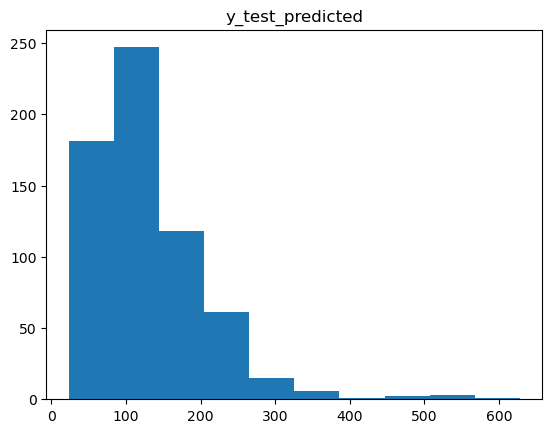

In [79]:
import matplotlib.pyplot as plt
plt.hist(y_test_preds)
plt.title('y_test_predicted')

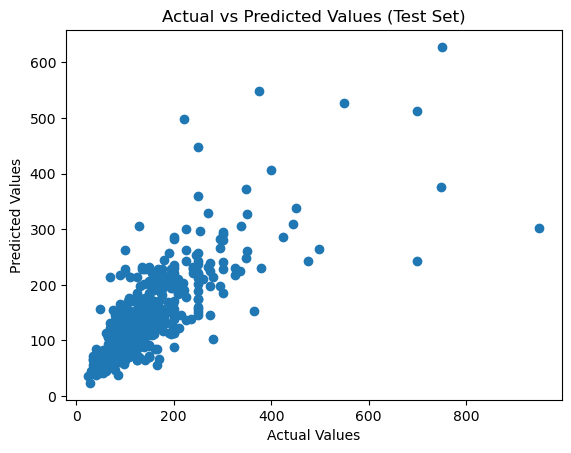

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Test Set)")
plt.show()


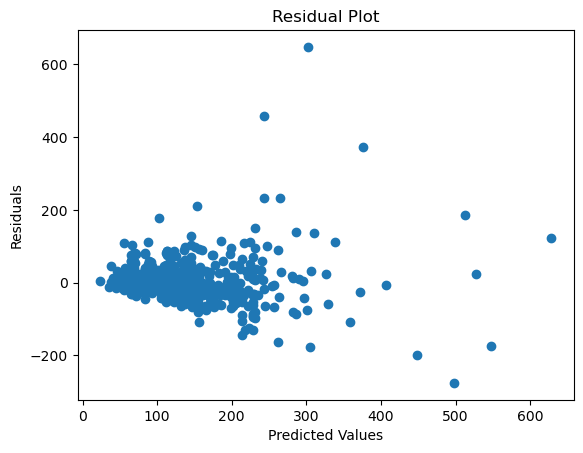

In [81]:
residuals = y_test - y_test_preds
plt.scatter(y_test_preds, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Model was moderately effective algorithm for predicting the price of Airbnb listings in Seattle.

# Citations:
Gradient Boosting Regressor<br>
https://medium.com/mlearning-ai/gradient-boosting-for-regression-from-scratch-bba968c16c57 <br>
https://www.geeksforgeeks.org/ml-gradient-boosting/ <br>
ElasticNetCV with linear regression model and Modeling in Python <br>
https://medium.com/mlearning-ai/elasticnet-regression-fundamentals-and-modeling-in-python-8668f3c2e39e <br>
Ridge regression model with polynomial features <br>
https://medium.com/@sidharths758/polynomial-regression-overfitting-and-ridge-regression-an-overview-70de53f0ccab <br>
https://www.geeksforgeeks.org/ml-ridge-regressor-using-sklearn/ <br>